In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imp

import prefs
imp.reload(prefs)
from prefs import *

In [4]:
perspSrc = np.array(input_image_rect, dtype=np.float32)
perspDst = np.array([[0, 0], [output_image_size[0]-1, 0], [output_image_size[0]-1, output_image_size[1]-1], [0, output_image_size[1]-1]], dtype=np.float32)
perspectiveTransform = cv2.getPerspectiveTransform(perspSrc, perspDst)
img1 = cv2.warpPerspective(gray, perspectiveTransform, (output_image_size[0], output_image_size[1]))

NameError: name 'gray' is not defined

In [15]:
leds = []
with open("leds.txt", "r") as f:
    for line in f:
        match = re.match("^\d+_\d+: (\d+) (\d+)", line)
        leds.append((int(match.group(1)), int(match.group(2))))

/usr/lib/python3/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


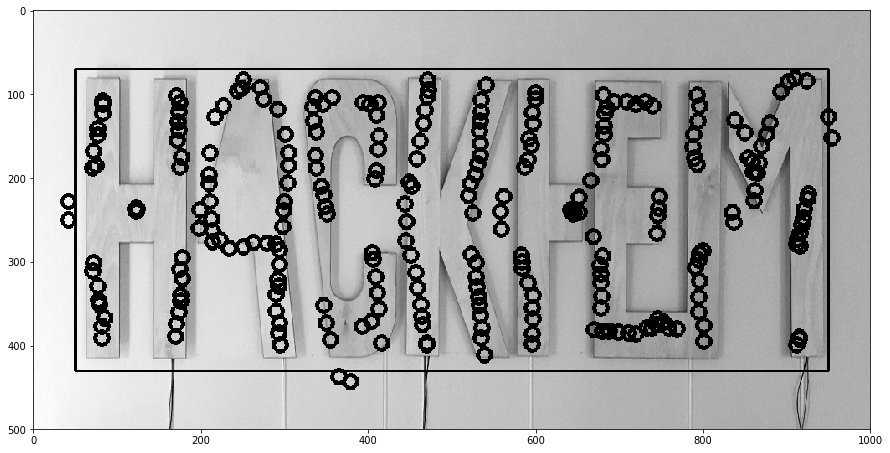

In [17]:
imgout = np.array(img1, copy=True)  
#cv2.circle(imgout,(center[0], center[1]), 20, (0,255,0), 6)

for led in leds:
    if led == (0, 0):
        continue
    cv2.circle(imgout,(led[0], led[1]), 8, (0,255,0), 3)
    
corx1 = 0 + out_point_padding[0]
corx2 = output_image_size[0] - out_point_padding[0]
cory1 = 0 + out_point_padding[1]
cory2 = output_image_size[1] - out_point_padding[1]

cv2.line(imgout, (corx1, cory1), (corx1, cory2), 1, 2)
cv2.line(imgout, (corx1, cory1), (corx2, cory1), 1, 2)
cv2.line(imgout, (corx2, cory2), (corx1, cory2), 1, 2)
cv2.line(imgout, (corx2, cory2), (corx2, cory1), 1, 2)

fig1 = plt.figure(figsize = (15,15))
ax1 = fig1.add_subplot(111)
ax1.imshow(imgout, cmap=plt.cm.gray, interpolation='nearest')
fig1.show()

In [ ]:
46